# Gtime
Example of TGraphTime.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:47 AM.</small></i>

In [1]:
%%cpp -d
#include "TCanvas.h"
#include "TRandom3.h"
#include "TMath.h"
#include "TText.h"
#include "TArrow.h"
#include "TGraphTime.h"
#include "TROOT.h"

 Arguments are defined. 

In [2]:
Int_t nsteps = 500;
Int_t np=100;

In [3]:
if (np > 1000) np = 1000;
Int_t color[1000];
Double_t rr[1000], phi[1000], dr[1000], size[1000];
TRandom3 r;
Double_t xmin = -10, xmax = 10, ymin = -10, ymax = 10;
TGraphTime *g = new TGraphTime(nsteps,xmin,ymin,xmax,ymax);
g->SetTitle("TGraphTime demo;X domain;Y domain");
Int_t i,s;
for (i=0;i<np;i++) { //calculate some object parameters
   rr[i]  = r.Uniform(0.1*xmax,0.2*xmax);
   phi[i] = r.Uniform(0,2*TMath::Pi());
   dr[i]  = r.Uniform(0,1)*0.9*xmax/Double_t(nsteps);
   Double_t rc = r.Rndm();
   color[i] = kRed;
   if (rc > 0.3) color[i] = kBlue;
   if (rc > 0.7) color[i] = kYellow;
   size[i] = r.Uniform(0.5,6);
}
for (s=0;s<nsteps;s++) { //fill the TGraphTime step by step
   for (i=0;i<np;i++) {
      Double_t newr = rr[i]+dr[i]*s;
      Double_t newsize = 0.2+size[i]*TMath::Abs(TMath::Sin(newr+10));
      Double_t newphi = phi[i] + 0.01*s;
      Double_t xx = newr*TMath::Cos(newphi);
      Double_t yy = newr*TMath::Sin(newphi);
      TMarker *m = new TMarker(xx,yy,20);
      m->SetMarkerColor(color[i]);
      m->SetMarkerSize(newsize);
      g->Add(m,s);
      if (i==np-1) g->Add(new TArrow(xmin,ymax,xx,yy,0.02,"-|>"), s);
   }
   g->Add(new TPaveLabel(.90,.92,.98,.97,Form("%d",s+1),"brNDC"),s);
}
g->Draw();

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Save object to a file

In [4]:
TFile f("gtime.root","recreate");
g->Write("g");

To view this object in another session do
  TFile f("gtime.root");
  g.Draw();

Draw all canvases 

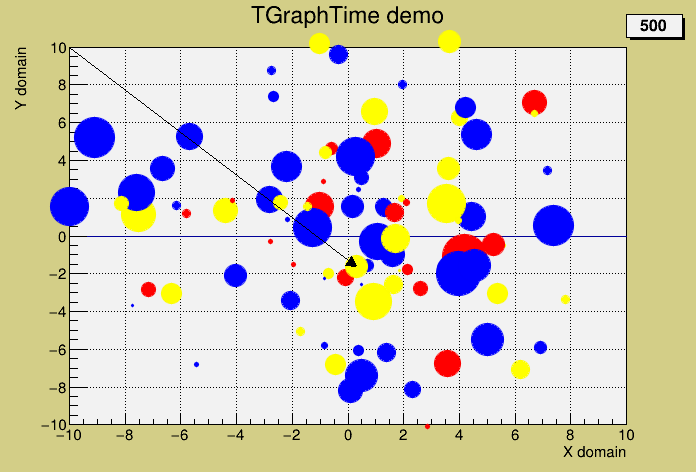

In [5]:
gROOT->GetListOfCanvases()->Draw()